In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import torch
import torch.nn as nn
from torchdiffeq import odeint_adjoint as odeint
from scipy.integrate import solve_ivp

In [2]:
t = torch.linspace(0.0, 25.0, 2000)
ts = (0,25)
sigma = 10.0
ro = 28.0
beta = 8.0/3.0

In [3]:
#SOLVE WITH ODEINT AND TORCH

In [4]:
true_A = torch.tensor([[-0.1,2.0],[-2.0, -0.1]])

In [5]:
class func(nn.Module):
    def forward(self,t,u):
        x = u[0,0]
        y = u[0,1]
        z = u[0,2]

        DE = np.zeros_like(u[0])

        DE[0] = sigma*(y-x)
        DE[1] = x*(ro-z)-y
        DE[2] = x*y - beta*z

        return torch.tensor(DE)
    
print(func().forward(t,torch.tensor([[1.0,1.0,1.0]])))

tensor([ 0.0000, 26.0000, -1.6667])


In [6]:
#SOLVE WITH SOLVE_IVP AND NUMPY

In [7]:
def slope(t,u):
    x = u[0]
    y = u[1]
    z = u[2]
    
    DE = np.zeros_like(u)
    
    DE[0] = sigma*(y-x)
    DE[1] = x*(ro-z)-y
    DE[2] = x*y - beta*z
    
    return DE
    
slope([],[1.0,1.0,1.0])

array([ 0.        , 26.        , -1.66666667])

In [8]:
#FUNCTIONS GENERAL

In [9]:
def random():
    rand = 0
    while abs(rand) < 0.5 or abs(rand) > 3:
        rand = np.random.normal(0, 1, 1)[0]
    return rand

In [10]:
#FUNCTIONS NUMPY

In [11]:
def getSlopesLorentz(x1,x2,x3):
    dim =  x1.shape[0] * x2.shape[0] * x3.shape[0]
    slopeList = np.zeros((dim,3))
    i = 0
    for m in x1:
        for l in x2:
            for k in x3:
                #print(slope([],[m,l,k]))
                slopeList[i] = slope([],[m,l,k])
                i += 1
    return slopeList

In [12]:
def drawDFNLorentz(ySpace,h):
    for l in ySpace:
        for m in ySpace:
            for n in ySpace:
                #direction i and j + Magnitude of <i,j>
                #print(slope([],[m,l,k]))
                i = slope([],[l,m,n])[0]
                j = slope([],[l,m,n])[1]
                k = slope([],[l,m,n])[2]
                magnitude = np.sqrt(i**2+j**2+k**2)

                #normalize and scale by h
                i = h*i/magnitude
                j = h*j/magnitude
                k = h*k/magnitude

                current_x = np.linspace(l-(i/2), l+(i/2), 2) #the end points of the small intervals
                current_y = np.linspace(m-(j/2), m+(j/2), 2)
                current_z = np.linspace(n-(k/2), n+(k/2), 2)

                ax.plot3D(current_x, current_y, current_z, lw=0.02, color='b')
                plt.arrow(current_x[0],current_y[0], i, j, color='blue', lw=0.5, length_includes_head=True, head_length=.006, head_width=.006)

In [13]:
#FUNCTIONS TORCH

In [14]:
def getSlopesTorch(x1,x2,x3):
    dim =  x1.shape[0] * x2.shape[0] * x3.shape[0]
    slopeList = torch.zeros((dim,3))
    i = 0
    for m in x1:
        for l in x1:
            for k in x3:
                #print(slope([],[l,k]))
                slopeList[i] = func().forward([],torch.tensor([[m,l,k]]))
                i += 1
    return slopeList

In [15]:
def drawDFT(ySpace,h):
    for l in ySpace:
        for k in ySpace:
            y = torch.tensor([[l,k]])
            t = torch.tensor([[]])
            #direction i and j + Magnitude of <i,j>
            i = func().forward(t,y)[:,0][0].numpy()
            j = func().forward(t,y)[:,1][0].numpy()
            magnitude = np.sqrt(i**2+j**2)
            
            #normalize and scale by h
            i = h*i/magnitude
            j = h*j/magnitude
            
            current_domain = np.linspace(l-(i/2), l+(i/2), 2) #the end points of the small intervals
            current_range = np.linspace(k-(j/2), k+(j/2), 2)

            plt.plot(current_domain, current_range, lw=1, color='b')
            plt.arrow(current_domain[0],current_range[0], i, j, color='b', lw=0.5, length_includes_head=True, head_length=.06, head_width=.06)

In [16]:
#GRAPHING

In [17]:
Y = torch.linspace(-2.0,2.0,20)
X = torch.linspace(-2.0,2.0,20)
h = 0.15

In [18]:
sl = getSlopesLorentz(X.numpy(),X.numpy(),X.numpy())
print(sl.size)
slx = np.zeros(8000)
sly = np.zeros(8000)
slz = np.zeros(8000)
for i in range(0,8000):
    slx[i] = sl[i,0]
    sly[i] = sl[i,1]
    slz[i] = sl[i,2]

24000


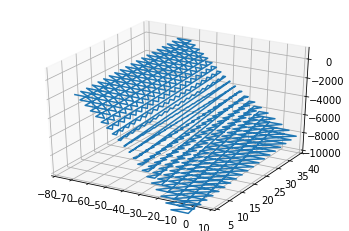

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(sly,slx,slz)
#print(sol45.y[0],sol45.y[1],sol45.y[2])
    
#drawDFNLorentz(Y.numpy(),h)
plt.xlim(-80,10)
plt.ylim(5,40)
ax.set_zlim(-10000,1000)
plt.show()

In [20]:
slT = getSlopesTorch(X.numpy(),X.numpy(),X.numpy())
print (torch.numel(slT))
slxT = torch.zeros(8000)
slyT = torch.zeros(8000)
slzT = torch.zeros(8000)
for i in range(0,8000):
    slxT[i] = slT[i,0]
    slyT[i] = slT[i,1]
    slzT[i] = slT[i,2]

24000


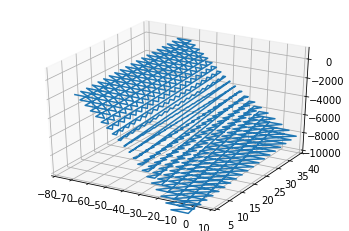

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(slyT.numpy(),slxT.numpy(),slzT.numpy())
#print(sol45.y[0],sol45.y[1],sol45.y[2])
    
#drawDFNLorentz(Y.numpy(),h)
plt.xlim(-80,10)
plt.ylim(5,40)
ax.set_zlim(-10000,1000)
plt.show()

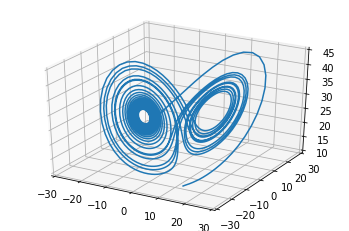

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')

y0 = [1.0,1.0,1.0]
sol45 = solve_ivp(slope, ts, y0, t_eval=t, method='RK45')
ax.plot3D(sol45.y[0],sol45.y[1],sol45.y[2])
#print(sol45.y[0],sol45.y[1],sol45.y[2])
    
#drawDFNLorentz(Y.numpy(),h)
plt.xlim(-30,30)
plt.ylim(-30,30)
ax.set_zlim(10,45)
plt.show()

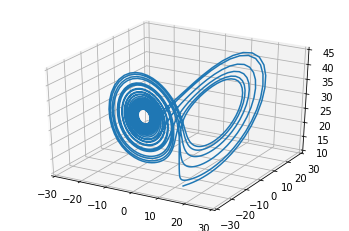

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')

y0 = torch.tensor([[1.0,1.0,1.0]])
solution = odeint(func(), y0, t, method='adams')
ax.plot3D(solution.numpy()[:,0,0],solution.numpy()[:,0,1],solution.numpy()[:,0,2])
#print(sol45.y[0],sol45.y[1],sol45.y[2])
    
#drawDFT(Y.numpy(),h)
plt.xlim(-30,30)
plt.ylim(-30,30)
ax.set_zlim(10,45)
plt.show()

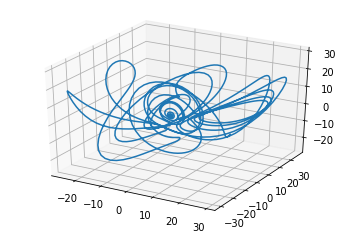

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(sol45.y[0]-solution.numpy()[:,0,0],sol45.y[1]-solution.numpy()[:,0,1],sol45.y[2]-solution.numpy()[:,0,2])

plt.show()

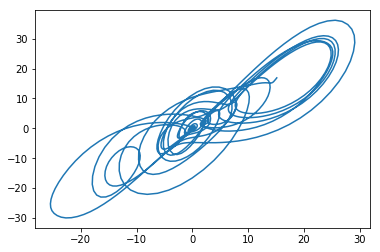

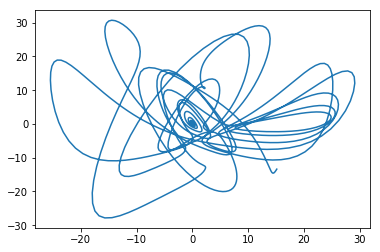

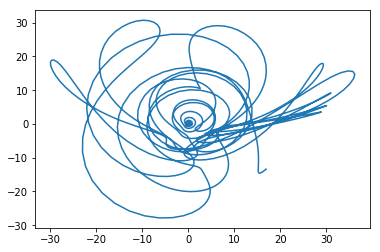

In [25]:
plt.plot(sol45.y[0]-solution.numpy()[:,0,0],sol45.y[1]-solution.numpy()[:,0,1])

plt.show()

plt.plot(sol45.y[0]-solution.numpy()[:,0,0],sol45.y[2]-solution.numpy()[:,0,2])

plt.show()

plt.plot(sol45.y[1]-solution.numpy()[:,0,1],sol45.y[2]-solution.numpy()[:,0,2])

plt.show()